<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1">EDA</a></span><ul class="toc-item"><li><span><a href="#Visualisations" data-toc-modified-id="Visualisations-1.1">Visualisations</a></span></li><li><span><a href="#Premières-infos" data-toc-modified-id="Premières-infos-1.2">Premières infos</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.3">Outliers</a></span></li><li><span><a href="#Distribution" data-toc-modified-id="Distribution-1.4">Distribution</a></span></li><li><span><a href="#Balancing" data-toc-modified-id="Balancing-1.5">Balancing</a></span></li><li><span><a href="#Corrélation" data-toc-modified-id="Corrélation-1.6">Corrélation</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-1.6.1">Features</a></span><ul class="toc-item"><li><span><a href="#Analyse-de-la-corrélation" data-toc-modified-id="Analyse-de-la-corrélation-1.6.1.1">Analyse de la corrélation</a></span></li></ul></li><li><span><a href="#Target" data-toc-modified-id="Target-1.6.2">Target</a></span><ul class="toc-item"><li><span><a href="#Analyse-de-la-corrélation" data-toc-modified-id="Analyse-de-la-corrélation-1.6.2.1">Analyse de la corrélation</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Undersampling-Preprocessing" data-toc-modified-id="Undersampling-Preprocessing-2">Undersampling Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Hold-out-et-baseline-model" data-toc-modified-id="Hold-out-et-baseline-model-2.1">Hold out et baseline model</a></span></li><li><span><a href="#Modèle-1-=-datacleaning" data-toc-modified-id="Modèle-1-=-datacleaning-2.2">Modèle 1 = datacleaning</a></span></li><li><span><a href="#Modèle-2-=-Scaling" data-toc-modified-id="Modèle-2-=-Scaling-2.3">Modèle 2 = Scaling</a></span></li><li><span><a href="#Modèle-3-=-PCA" data-toc-modified-id="Modèle-3-=-PCA-2.4">Modèle 3 = PCA</a></span></li><li><span><a href="#Modèle-4-=-modèle" data-toc-modified-id="Modèle-4-=-modèle-2.5">Modèle 4 = modèle</a></span></li><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-2.6">GridSearch</a></span><ul class="toc-item"><li><span><a href="#LR" data-toc-modified-id="LR-2.6.1">LR</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-2.6.2">SVC</a></span></li><li><span><a href="#KNC" data-toc-modified-id="KNC-2.6.3">KNC</a></span></li><li><span><a href="#SGD" data-toc-modified-id="SGD-2.6.4">SGD</a></span></li><li><span><a href="#RF" data-toc-modified-id="RF-2.6.5">RF</a></span></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.7">Outliers</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.7.1">PCA</a></span></li></ul></li><li><span><a href="#feature-ingenierie" data-toc-modified-id="feature-ingenierie-2.8">feature ingenierie</a></span></li></ul></li><li><span><a href="#Oversampling-Preprocessing" data-toc-modified-id="Oversampling-Preprocessing-3">Oversampling Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Hold-out-et-baseline-model" data-toc-modified-id="Hold-out-et-baseline-model-3.1">Hold out et baseline model</a></span></li><li><span><a href="#Modèle-1-=-datacleaning" data-toc-modified-id="Modèle-1-=-datacleaning-3.2">Modèle 1 = datacleaning</a></span></li></ul></li></ul></div>

_Your target is called "Bankrupt ?", which has the value 0 if the company has not gone bankrupt, and the value 1 if the company has gone bankrupt._

In [1]:
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn import datasets, metrics, model_selection, svm
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


# Holdout
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import set_config; set_config(display='diagram') # Pour visualiser 

# PCA
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from mlxtend.plotting import plot_pca_correlation_graph

# GridSearch
from sklearn.model_selection import GridSearchCV


df_raw = pd.read_csv('data/data.csv')
df_raw = df_raw.rename(columns=lambda x: x.strip()) #enlever espace blanc
df_raw = df_raw.rename(columns={"Net Income to Stockholder's Equity": 'Net Income to Stockholders Equity'})
df_raw = df_raw.drop_duplicates() # Duplicates
pd.options.display.max_columns = None
display(df_raw.head())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.00688

# EDA

## Visualisations

In [ ]:
# Montrer que le dataset n'est pas balancé 
# Montrer en fonction du revenue ? 

## Premières infos

In [ ]:
# colonnes num/cat   et   shape / observation  et   missing values
print(df_raw.info())
df_raw.describe()
# Il n'y a pas de null / 96 colonnes pour 6819 lignes / 3 int64 + 93 float(64)
# De nombreuses colonnes ont des valeurs max et min suspectes

# df.isnull().sum()
# df.isna().sum()
# Pas de valeurs null ou NaN

## Outliers

## Distribution

In [ ]:
# Distribution gaussienne pour toutes les features (RAS)
# Operating Profit Rate / Operating Expense Rate (beaucoup de zero)

# df['Net Income Flag'].value_counts() = Il n'y a que des 1 / drop

# Liability-Assets Flag = 0.14 de corrélation / 8 valeur en 1 dont 6 qui influence bankrupt en 1 / On laisse la colonne pour l'instant
# df_new = df[(df['Interest-bearing debt interest rate']>0.01) & (df['Liability-Assets Flag']<0.99)]
# df_new = df 
# print(df_new['Liability-Assets Flag'].value_counts())
# print(df_new['Bankrupt?'].value_counts())
# print(df_new.shape)


for col in df:
    plt.figure()
    sns.distplot(df[col], kde=True)

## Balancing

In [ ]:
df['Bankrupt?'].value_counts()
# 6599 - 0 vs 220 - 1 / le dataset n'est pas du tout balancé de base

## Corrélation

### Features

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

#### Analyse de la corrélation

**~~ROA(C) before interest and depreciation before interest~~**  
**~~ROA(A) before interest and % after tax~~**  
**~~ROA(B) before interest and depreciation after tax~~**  
**Net Income to Total Assets**  
_Le ROA (Return on assets) permet de mesurer le rapport entre le résultat net et le total des actifs d'une entreprise. C'est un indicateur clé car il exprime la capacité à générer du revenu à partir de ressources._  
_Les 3 sont extrémements corrélees (0.94). Peut-être faire une moyenne_  
_Corrélation avec Net Income to Total Assets (0.86 pour le C à 0.96 pour le A)_<br><br>

**Operating Profit Rate  
Pre-tax net Interest Rate  
After-tax net Interest Rate  
Continuous interest rate (after tax)**  
_Les 4 sont corrélees fortement (0.86 à 0.99)_<br><br>

**Cash Flow Per Share  
Revenue Per Share (Yuan ¥)**  <br><br>

**Persistent EPS in the Last Four Seasons  
Operating Profit Per Share (Yuan ¥)    
Per Share Net profit before tax (Yuan ¥)   
Operating profit/Paid-in capital  
Net profit before tax/Paid-in capital**  
_Les 5 sont corrélees fortement (0.85 pour operating à 0.95 pour share avec persistent)_<br><br>


**Borrowing dependency  
Current Liabilities/Equity  
Current Liabilities/Liability  
Liability to Equity**      
_Les 4 sont corrélees fortement avec borrowing dependency (0.89 / 0.95 pour la dernière avec Borrowing dependency)_  
_Current Liabilities/Equity et Liability to Equity corrélation de 0.96_  <br><br>


**Working Capital to Total Assets  
Quick Assets/Total Assets  
Current Assets/Total Assets  
Cash/Total Assets**  
_Petite corrélation (0.60 / 0.75 )_<br><br>

**Quick Assets/Current Liability  
Cash/Current Liability**<br><br>

**Current Liability to Assets   
Debt ratio %**   
_Petite corrélation (0.84)_<br><br>

**Operating Funds to Liability  
Cash flow rate**  
_Petite corrélation (0.88)_<br><br> 


**Working capitcal Turnover Rate  
Cash Flow to Sales**   
_Corrélation (0.94)_<br><br>


**~~Operating Gross Margin~~**  
**~~Realized Sales Gross Margin~~**  
**~~Gross Profit to Sales~~**   
_Les 3 sont extrémements corrélees (0.99)_<br><br>

**~~Current Liability to Liability~~  
Current Liabilities/Liability**  
_Corrélation de 1_<br><br>

**Current Liabilities/Equity   
~~Liability to Equity~~    
~~Current Liability to Equity~~**    
_Corrélation de 1 entre / et to + O.96 entre / et sans current_<br><br>

**~~Net Value Per Share (B)~~**  
**~~Net Value Per Share (A)~~**  
**~~Net Value Per Share (C)~~**  
_Les 3 sont extrémements corrélees (0.99)_ <br><br> 

**Non-industry income and expenditure/revenue   
Operating Expense Rate  
Research and development expense rate    
Interest-bearing debt interest rate    
Tax rate (A)  
Realized Sales Gross Profit Growth Rate  
Operating Profit Growth Rate  
After-tax Net Profit Growth Rate  
Regular Net Profit Growth Rate  
Continuous Net Profit Growth Rate  
Total Asset Growth Rate  
Net Value Growth Rate  
Total Asset Return Growth Rate Ratio 
Cash Reinvestment %   
Current Ratio  
Quick Ratio  
Interest Expense Ratio  
Total debt/Total net worth   
Net worth/Assets  
Long-term fund suitability ratio (A)  
Contingent liabilities/Net worth  
Inventory and accounts receivable/Net value  
Total Asset Turnover  
Accounts Receivable Turnover  
Average Collection Days  
Inventory Turnover Rate (times)  
Fixed Assets Turnover Frequency  
Net Worth Turnover Rate (times)  
Revenue per person  
Operating profit per person  
Allocation rate per person  
Inventory/Working Capital  
Inventory/Current Liability    
Working Capital/Equity  
Long-term Liability to Current Assets  
Retained Earnings to Total Assets  
Total income/Total expense  
Total expense/Assets  
Current Asset Turnover Rate  
Quick Asset Turnover Rate  
Cash Turnover Rate   
Fixed Assets to Assets  
Equity to Long-term Liability  
Cash Flow to Total Assets  
Cash Flow to Liability  
CFO to Assets  
Cash Flow to Equity  
Current Liability to Current Assets  
Liability-Assets Flag   
Total assets to GNP price  
No-credit Interval  
Net Income to Stockholder's Equity  
Degree of Financial Leverage (DFL)  
Interest Coverage Ratio (Interest expense to EBIT)  
Net Income Flag  
Equity to Liability**  

### Target

In [ ]:
# Voir les corrélations avec la target

target = df.corr()
target = pd.DataFrame(target['Bankrupt?'])
target.sort_values(by='Bankrupt?', ascending=False, inplace=True)
target


df_target = df[['Bankrupt?','Net Value Per Share', 'Net Income to Stockholders Equity', 'Working Capital to Total Assets',
                  'Per Share Net profit before tax (Yuan ¥)', 'Debt ratio %', 'Current Liability to Assets', 
                 'Current Liability to Current Assets', 'Borrowing dependency']]

In [ ]:
sns.pairplot(data=df, hue='Bankrupt?')

#### Analyse de la corrélation

**le moins de corrélations (0.00)**  
Operating Expense Rate -0.006145  
Revenue Per Share (Yuan ¥) -0.003647  
Realized Sales Gross Profit Growth Rate 0.009120  
Interest Expense Ratio 0.005400  
Inventory/Current Liability 0.00082  
Long-term Liability to Current Assets 0.000821  
Accounts Receivable Turnover -0.003268  
Average Collection Days -0.006301  
Inventory Turnover Rate (times) -0.001576  
Allocation rate per person 0.002762  
Quick Assets/Current Liability -0.003860  
Inventory/Working Capital -0.003167  
Cash Flow to Sales -0.006735  
No-credit Interval -0.008626  
Interest Coverage Ratio (Interest expense to EBIT) -0.007208  

**Plus de corrélations**   
Net Value Per Share -0.180462  
Net Income to Stockholders Equity -0.182086  
Working Capital to Total Assets -0.198057  
Per Share Net profit before tax (Yuan ¥) -0.210435  
Net profit before tax/Paid-in capital -0.216158  
Persistent EPS in the Last Four Seasons -0.231273  
Retained Earnings to Total Assets -0.255450  
Net worth/Assets -0.257321  
ROA -0.284310  
Net Income to Total Assets -0.335542  

Debt ratio % 0.257321  
Current Liability to Assets 0.201234  
Current Liability to Current Assets 0.193670  
Borrowing dependency 0.176481  
Total expense/Assets 0.158928  
Current Liabilities/Equity 0.154425  
Liability-Assets Flag 0.149617  


# Undersampling Preprocessing

## Hold out et baseline model

In [ ]:
df1 = df_raw[(df_raw['Bankrupt?'] == 0)]
df1 = df1.sample(n=220,random_state=1)

df2 = df_raw[(df_raw['Bankrupt?'] == 1)]

df_model1 = df1.append(df2)

X = df_model1.drop(['Bankrupt?'], axis=1)
y = df_model1['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

## Modèle 1 = datacleaning

0.5757575757575758
              precision    recall  f1-score   support

           0       0.53      0.74      0.62        61
           1       0.66      0.44      0.53        71

    accuracy                           0.58       132
   macro avg       0.59      0.59      0.57       132
weighted avg       0.60      0.58      0.57       132



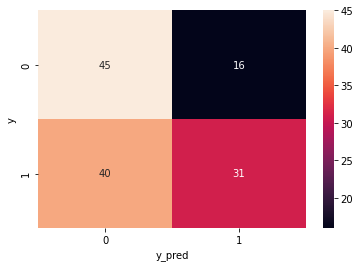

In [2]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df3 = df[(df['Bankrupt?'] == 0)]
df3 = df3.sample(n=220,random_state=1)

df4 = df[(df['Bankrupt?'] == 1)]

df_model2 = df3.append(df4)

model = LogisticRegression()

X = df_model2.drop(['Bankrupt?'], axis=1)
y = df_model2['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

## Modèle 2 = Scaling

0.8636363636363636
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.86      0.91      0.88        74

    accuracy                           0.86       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.86      0.86      0.86       132



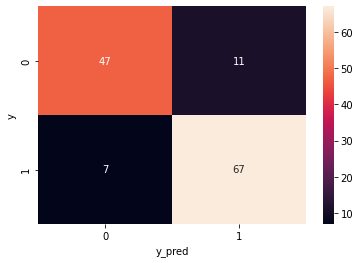

In [4]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)

df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model3 = df5.append(df6)

LR_model = LogisticRegression()

# preprocessor = ColumnTransformer(('scaling', StandardScaler()))

LR_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('LR', LR_model)])

X = df_model3.drop(['Bankrupt?'], axis=1)
y = df_model3['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))

def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

_StandardScaler = 0.8181  
RobustScaler = 0.4393  
MinMaxScaler = 0.8636_

## Modèle 3 = PCA

In [13]:
# pca = PCA()
# principal_components = pca.fit_transform(df_raw)
# principal_components = pd.DataFrame(data = principal_components)
# px.line(np.cumsum(pca.explained_variance_ratio_))

# 5 composantes = 0.82
# 6 composantes = 0.91

0.8560606060606061
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        58
           1       0.86      0.89      0.87        74

    accuracy                           0.86       132
   macro avg       0.86      0.85      0.85       132
weighted avg       0.86      0.86      0.86       132



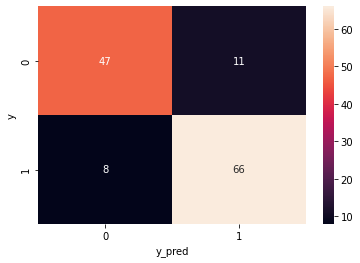

In [13]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model4 = df5.append(df6)

LR_model = LogisticRegression()

LR_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
    ('LR', LR_model)])

X = df_model4.drop(['Bankrupt?'], axis=1)
y = df_model4['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

_5 composantes = 0.85606  
6 composantes = 0.85606_

## Modèle 4 = modèle

0.7954545454545454
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        58
           1       0.82      0.81      0.82        74

    accuracy                           0.80       132
   macro avg       0.79      0.79      0.79       132
weighted avg       0.80      0.80      0.80       132



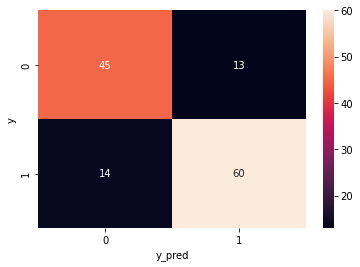

In [8]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model5 = df5.append(df6)

LR_model = LogisticRegression()
SVC_model = SVC()
KNC_model = KNeighborsClassifier()
SGD_model = SGDClassifier()
RF_model = RandomForestClassifier()

LR_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
#     ('LR', LR_model),
#     ('SVC', SVC_model),
#     ('KNC', KNC_model),
#     ('SGD', SGD_model),
#     ('RF', RF_model),
    ])

X = df_model5.drop(['Bankrupt?'], axis=1)
y = df_model5['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

_KNeighborsClassifier = 0.7727   
Random Forest = 0.7954   
SVC = 0.8106   
SGDClassifier = 0.8257_

## GridSearch

In [ ]:
# get all params of the trained pipe. 
SVC_pipe_trained.get_params()

### LR

In [ ]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model5 = df5.append(df6)

LR_model = LogisticRegression()

LR_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
    ('LR', LR_model),
    ])

# Instanciate grid search
grid_search = GridSearchCV(
    LR_pipe, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'SVC__C': [0.1, 1, 10, 100],
        'SVC__gamma': [0.1, 1, 10, 100],
        'SVC__kernel': ['linear', 'poly']}, cv=5, verbose=3, scoring="accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_params_


X = df_model5.drop(['Bankrupt?'], axis=1)
y = df_model5['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

### SVC

In [ ]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model5 = df5.append(df6)

SVC_model = SVC()
KNC_model = KNeighborsClassifier()
SGD_model = SGDClassifier()
RF_model = RandomForestClassifier()

SVC_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
    ('SVC', SVC_model),
    ])

# Instanciate grid search
grid_search = GridSearchCV(
    SVC_pipe, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'SVC__C': [0.1, 1, 10, 100],
        'SVC__gamma': [0.1, 1, 10, 100],
        'SVC__kernel': ['linear', 'poly']}, cv=5, verbose=3, scoring="accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_params_


X = df_model5.drop(['Bankrupt?'], axis=1)
y = df_model5['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

### KNC

In [ ]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model5 = df5.append(df6)

KNC_model = KNeighborsClassifier()

KNC_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
    ('KNC', KNC_model),
    ])

# Instanciate grid search
grid_search = GridSearchCV(
    KNC_pipe, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'SVC__C': [0.1, 1, 10, 100],
        'SVC__gamma': [0.1, 1, 10, 100],
        'SVC__kernel': ['linear', 'poly']}, cv=5, verbose=3, scoring="accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_params_


X = df_model5.drop(['Bankrupt?'], axis=1)
y = df_model5['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

### SGD

In [ ]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model5 = df5.append(df6)

SGD_model = SGDClassifier()

SGD_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
    ('SGD', SGD_model),
    ])

# Instanciate grid search
grid_search = GridSearchCV(
    SGD_pipe, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'SVC__C': [0.1, 1, 10, 100],
        'SVC__gamma': [0.1, 1, 10, 100],
        'SVC__kernel': ['linear', 'poly']}, cv=5, verbose=3, scoring="accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_params_


X = df_model5.drop(['Bankrupt?'], axis=1)
y = df_model5['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

### RF

In [ ]:
df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag'], axis=1)


df5 = df[(df['Bankrupt?'] == 0)]
df5 = df.sample(n=220,random_state=1)

df6 = df[(df['Bankrupt?'] == 1)]

df_model5 = df5.append(df6)

RF_model = RandomForestClassifier()

RF_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('PCA', PCA(n_components = 6)),
    ('RF', RF_model),
    ])

# Instanciate grid search
grid_search = GridSearchCV(
    RF_pipe, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'SVC__C': [0.1, 1, 10, 100],
        'SVC__gamma': [0.1, 1, 10, 100],
        'SVC__kernel': ['linear', 'poly']}, cv=5, verbose=3, scoring="accuracy")

grid_search.fit(X_train, y_train)
grid_search.best_params_


X = df_model5.drop(['Bankrupt?'], axis=1)
y = df_model5['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(classification_report(y_test, y_pred))


def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

## Outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_model3 =((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

### PCA

## feature ingenierie

In [ ]:
* feature ingenierie  
** Encoding (Onehot encoder)  
(On peut faire un premier pipeline ici et tester avec un KNN pour comparer avec un autre modèle)
** Discretizing : Continue --> discret (exo vin : Note en good quality ou bad quality)

* feature selection
** Feature permutation
** Regularization

* feature ingenierie  
** PCA
** Kmeans




Create New Features :

SVM
Decision tree
RandomForest
Model tunning


Modelisation 

Evaluation

Déploiement

In [ ]:
# possibilité de séparer notre dataset pour faire une PCA sur des colonnes en particulier

# Oversampling Preprocessing

## Hold out et baseline model

## Modèle 1 = datacleaning

In [ ]:
# Gestion des outliers 0 et 1 (on enlève le 0 et 1 si cela ne touche pas le 220 de 1)
col_outliers = df.drop(['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag',
                   'Operating Profit Rate', 'Operating Expense Rate', 'Research and development expense rate',
                   'Interest-bearing debt interest rate', 'Tax rate (A)', 'Persistent EPS in the Last Four Seasons', 
                    'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 
                    'Per Share Net profit before tax (Yuan ¥)', 'Total Asset Growth Rate',
                   'Net Value Growth Rate', 'Cash Reinvestment %', 'Current Ratio', 'Quick Ratio',
                   'Total debt/Total net worth', 'Debt ratio %', 'Net worth/Assets', 'Long-term fund suitability ratio (A)',
                   'Borrowing dependency', 'Contingent liabilities/Net worth', 'Operating profit/Paid-in capital',
                   'Net profit before tax/Paid-in capital', 'Inventory and accounts receivable/Net value',
                   'Total Asset Turnover', 'Accounts Receivable Turnover', 'Average Collection Days',
                   'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency', 'Net Worth Turnover Rate (times)',
                   'Revenue per person', 'Allocation rate per person', 'Current Assets/Total Assets',
                   'Cash/Total Assets', 'Quick Assets/Current Liability', 'Cash/Current Liability', 'Current Liability to Assets',
                   'Inventory/Current Liability', 'Current Liabilities/Liability', 'Working Capital/Equity',
                   'Current Liabilities/Equity', 'Long-term Liability to Current Assets', 'Total income/Total expense',
                  'Total expense/Assets', 'Current Asset Turnover Rate', 'Quick Asset Turnover Rate', 'Cash Turnover Rate',
                  'Fixed Assets to Assets', 'Equity to Long-term Liability', 'Cash Flow to Equity', 
                   'Current Liability to Current Assets', 'Total assets to GNP price', 'Net Income to Stockholders Equity',
                   'Equity to Liability'], axis=1)


for col in (col_outliers.columns):
    df_new = df[(df[col]>0.01) & (df[col]<0.99)]
    df = df_new
#     print(col)
#     print(df['Bankrupt?'].value_counts())
#     print(df.shape)
df.head()